In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot
import tensorflow as tf

In [2]:
import pickle

def load_picked_data(file, columns):
    """
    Loads pickled training and test data.

    Parameters:
    -----------
        file: file name
        column: column name
    Returns:
    --------
    A tuple of datasets for given column.
    """

    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda x: dataset[x], columns))

Kod, który widzisz, jest funkcją w Pythonie, która służy do wczytywania danych z plików pickle. Pliki pickle są używane do serializacji i deserializacji struktury obiektów Pythona. Co to oznacza? Serializacja to proces konwersji obiektu (struktury danych) do formatu, który może być przechowywany (na przykład w pliku lub w pamięci bufora), podczas gdy deserializacja to odwrotny proces.

Funkcja `load_picked_data` przyjmuje dwa argumenty: `file` i `columns`. `file` to nazwa pliku, z którego mają być wczytane dane, a `columns` to kolumny, które mają być wczytane z pliku.

Wewnątrz funkcji, używamy instrukcji `with` do otwarcia pliku. `with` jest używane w Pythonie do uproszczenia zarządzania zasobami, takich jak pliki. W tym przypadku, po zakończeniu bloku kodu `with`, plik zostanie automatycznie zamknięty, nawet jeśli wystąpi błąd podczas przetwarzania danych.

Następnie, używamy funkcji `pickle.load(f)` do wczytania danych z pliku. Wynik jest przypisywany do zmiennej `dataset`.

Na koniec, funkcja zwraca krotkę, która jest wynikiem mapowania kolumn z `dataset` do nowej krotki. `map` jest wbudowaną funkcją w Pythonie, która służy do stosowania funkcji do każdego elementu iterowalnego (takiego jak lista lub krotka). W tym przypadku, używamy `lambda` do stworzenia krótkiej funkcji anonimowej, która zwraca wartość dla danego klucza (kolumny) z `dataset`.

In [4]:
from pandas.io.parsers import read_csv

signnames = read_csv('data/label_names.csv').values[:, 1]
train_dataset_file = 'data/train.pickle'
test_dataset_file = 'data/test.pickle'
# train_balanced_dataset_file = 'traffic_signs-data/train_balanced.p'

X_train, y_train = load_picked_data(train_dataset_file, ['features', 'labels'])
X_test, y_test = load_picked_data(test_dataset_file, ['features', 'labels'])

n_train = y_train.shape[0]
n_test = y_test.shape[0]
image_shape = X_train[0].shape
image_size = image_shape[0]
sign_classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)
n_classes = class_counts.shape[0]

print('Number of training examples = ', n_train)
print('Number of testing examples = ', n_test)
print('Image data shape = ', image_shape)
print('Number of classes = ', n_classes)

Number of training examples =  34799
Number of testing examples =  12630
Image data shape =  (32, 32, 3)
Number of classes =  43


Kod, który widzisz, jest częścią skryptu Pythona, który wczytuje i analizuje zbiór danych do rozpoznawania znaków drogowych.

Na początku, importujemy funkcję `read_csv` z modułu `pandas.io.parsers`. `read_csv` jest używane do wczytywania danych z plików CSV. Następnie wczytujemy plik 'signnames.csv' i bierzemy tylko drugą kolumnę (indeksowane od 0) z każdego wiersza.

Następnie, definiujemy nazwy plików dla naszych zbiorów danych treningowych i testowych. Te pliki są w formacie pickle, który jest używany do serializacji i deserializacji obiektów Pythona.

Korzystamy z wcześniej zdefiniowanej funkcji `load_picked_data` do wczytania danych treningowych i testowych. Ta funkcja zwraca dwie wartości: `X_train`/`X_test` (cechy) i `y_train`/`y_test` (etykiety).

Następnie, obliczamy kilka statystyk na temat naszych danych. `n_train` i `n_test` to liczba przykładów treningowych i testowych. `image_shape` to kształt pojedynczego obrazu (wymiary), a `image_size` to rozmiar jednego wymiaru obrazu. `sign_classes`, `class_indices` i `class_counts` to unikalne klasy, indeksy i liczby wystąpień tych klas w `y_train`. `n_classes` to liczba unikalnych klas.

Na koniec, drukujemy te statystyki, aby zrozumieć, jakie mamy dane.

Class 0: Speed limit (20km/h)                               180 samples


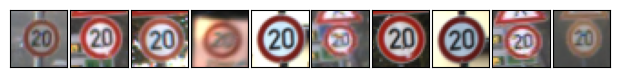

-------------------------------------------------------------------------------------

Class 1: Speed limit (30km/h)                               1980 samples


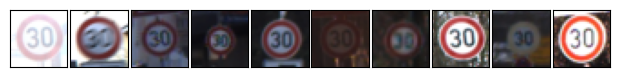

-------------------------------------------------------------------------------------

Class 2: Speed limit (50km/h)                               2010 samples


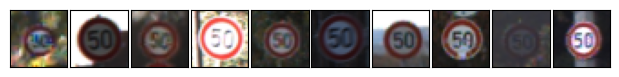

-------------------------------------------------------------------------------------

Class 3: Speed limit (60km/h)                               1260 samples


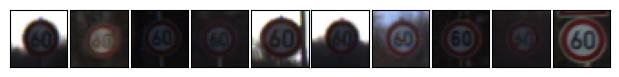

-------------------------------------------------------------------------------------

Class 4: Speed limit (70km/h)                               1770 samples


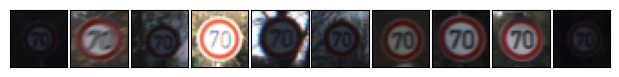

-------------------------------------------------------------------------------------

Class 5: Speed limit (80km/h)                               1650 samples


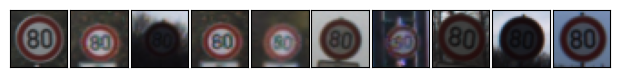

-------------------------------------------------------------------------------------

Class 6: End of speed limit (80km/h)                        360 samples


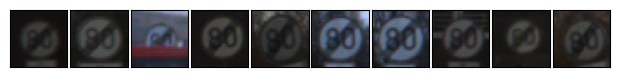

-------------------------------------------------------------------------------------

Class 7: Speed limit (100km/h)                              1290 samples


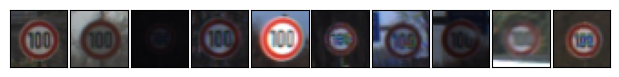

-------------------------------------------------------------------------------------

Class 8: Speed limit (120km/h)                              1260 samples


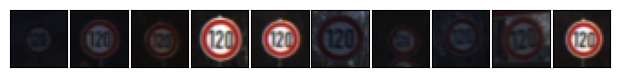

-------------------------------------------------------------------------------------

Class 9: No passing                                         1320 samples


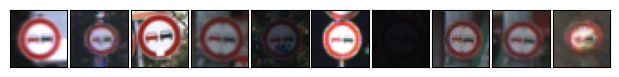

-------------------------------------------------------------------------------------

Class 10: No passing for vehicles over 3.5 metric tons       1800 samples


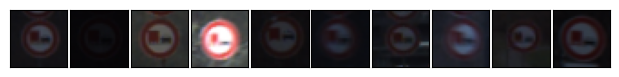

-------------------------------------------------------------------------------------

Class 11: Right-of-way at the next intersection              1170 samples


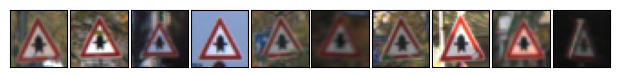

-------------------------------------------------------------------------------------

Class 12: Priority road                                      1890 samples


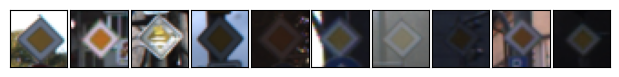

-------------------------------------------------------------------------------------

Class 13: Yield                                              1920 samples


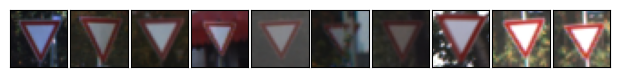

-------------------------------------------------------------------------------------

Class 14: Stop                                               690 samples


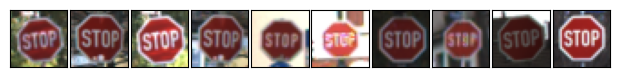

-------------------------------------------------------------------------------------

Class 15: No vehicles                                        540 samples


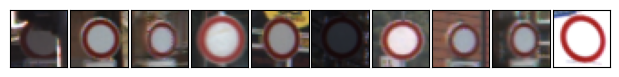

-------------------------------------------------------------------------------------

Class 16: Vehicles over 3.5 metric tons prohibited           360 samples


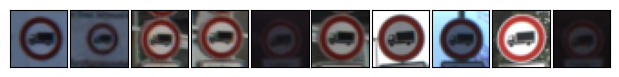

-------------------------------------------------------------------------------------

Class 17: No entry                                           990 samples


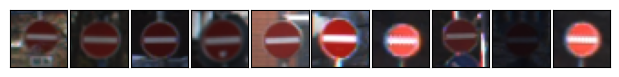

-------------------------------------------------------------------------------------

Class 18: General caution                                    1080 samples


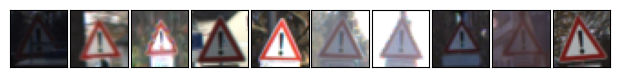

-------------------------------------------------------------------------------------

Class 19: Dangerous curve to the left                        180 samples


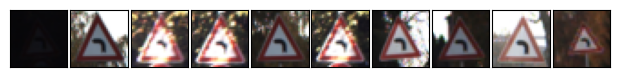

-------------------------------------------------------------------------------------

Class 20: Dangerous curve to the right                       300 samples


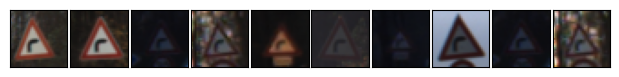

-------------------------------------------------------------------------------------

Class 21: Double curve                                       270 samples


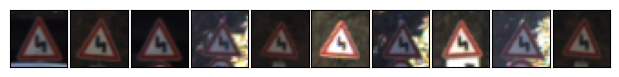

-------------------------------------------------------------------------------------

Class 22: Bumpy road                                         330 samples


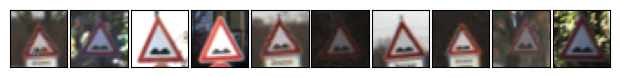

-------------------------------------------------------------------------------------

Class 23: Slippery road                                      450 samples


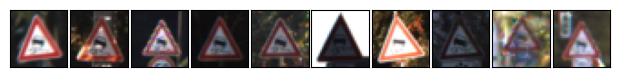

-------------------------------------------------------------------------------------

Class 24: Road narrows on the right                          240 samples


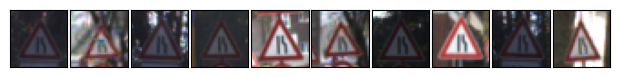

-------------------------------------------------------------------------------------

Class 25: Road work                                          1350 samples


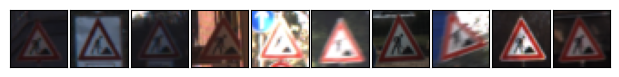

-------------------------------------------------------------------------------------

Class 26: Traffic signals                                    540 samples


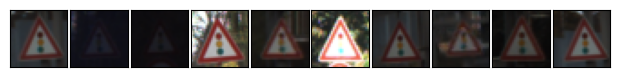

-------------------------------------------------------------------------------------

Class 27: Pedestrians                                        210 samples


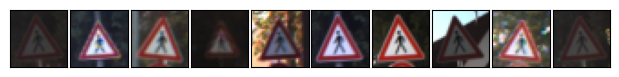

-------------------------------------------------------------------------------------

Class 28: Children crossing                                  480 samples


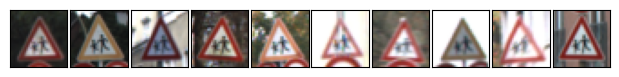

-------------------------------------------------------------------------------------

Class 29: Bicycles crossing                                  240 samples


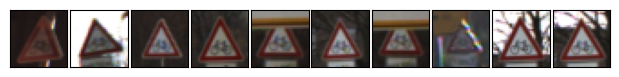

-------------------------------------------------------------------------------------

Class 30: Beware of ice/snow                                 390 samples


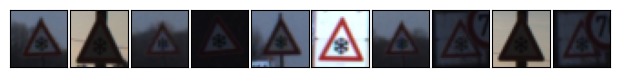

-------------------------------------------------------------------------------------

Class 31: Wild animals crossing                              690 samples


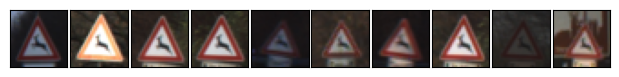

-------------------------------------------------------------------------------------

Class 32: End of all speed and passing limits                210 samples


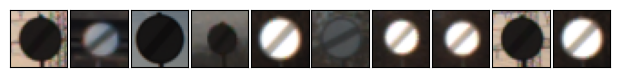

-------------------------------------------------------------------------------------

Class 33: Turn right ahead                                   599 samples


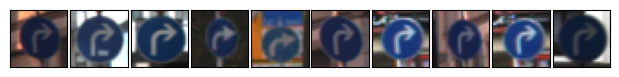

-------------------------------------------------------------------------------------

Class 34: Turn left ahead                                    360 samples


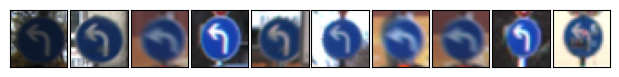

-------------------------------------------------------------------------------------

Class 35: Ahead only                                         1080 samples


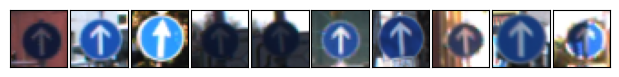

-------------------------------------------------------------------------------------

Class 36: Go straight or right                               330 samples


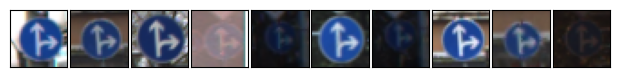

-------------------------------------------------------------------------------------

Class 37: Go straight or left                                180 samples


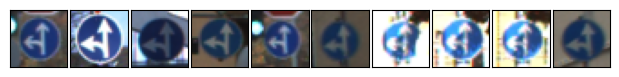

-------------------------------------------------------------------------------------

Class 38: Keep right                                         1860 samples


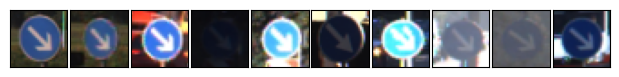

-------------------------------------------------------------------------------------

Class 39: Keep left                                          270 samples


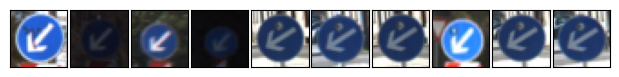

-------------------------------------------------------------------------------------

Class 40: Roundabout mandatory                               300 samples


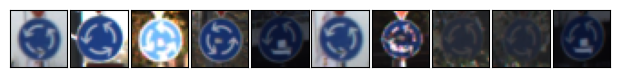

-------------------------------------------------------------------------------------

Class 41: End of no passing                                  210 samples


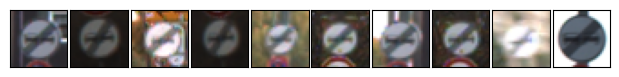

-------------------------------------------------------------------------------------

Class 42: End of no passing by vehicles over 3.5 metric tons 210 samples


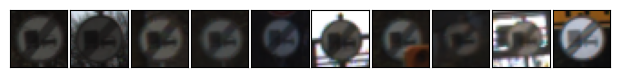

-------------------------------------------------------------------------------------



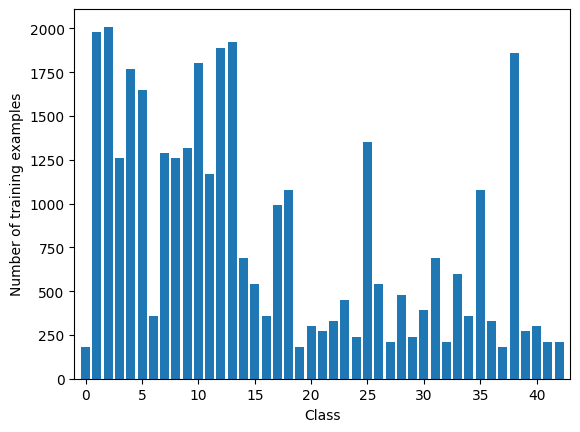

In [6]:
import random

col_width = max(len(name) for name in signnames)
for c, c_index, c_count in zip(sign_classes, class_indices, class_counts):
    print('Class %i: %-*s %s samples' % (c, col_width, signnames[c], c_count))
    fig = pyplot.figure(figsize=(6, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    random_indices = random.sample(range(c_index, c_index + c_count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    pyplot.show()
    print('-------------------------------------------------------------------------------------\n')

pyplot.bar(np.arange(43), class_counts, align='center')
pyplot.xlabel('Class')
pyplot.ylabel('Number of training examples')
pyplot.xlim([-1, 43])
pyplot.show()

Ten fragment kodu Pythona jest używany do wyświetlania przykładowych obrazów dla każdej klasy znaków drogowych oraz do wygenerowania histogramu pokazującego liczbę przykładów treningowych dla każdej klasy.

Na początku, dla każdej klasy znaków drogowych (reprezentowanej przez `c`), kod wydrukuje nazwę klasy i liczbę przykładów w tej klasie. Następnie tworzy wykres, na którym wyświetla 10 losowo wybranych obrazów z tej klasy. Wybór losowych obrazów jest realizowany za pomocą funkcji `random.sample`, która losuje unikalne elementy z określonego zakresu.

Po wygenerowaniu wykresu dla każdej klasy, kod tworzy histogram za pomocą funkcji `pyplot.bar`. Na osi x histogramu znajdują się klasy, a na osi y - liczba przykładów treningowych dla każdej klasy. Oznacza to, że każdy słupek na wykresie reprezentuje jedną klasę, a wysokość słupka pokazuje, ile przykładów treningowych jest dostępnych dla tej klasy.

Warto zauważyć, że klasa `zip` jest używana do jednoczesnego iterowania przez trzy listy (`sign_classes`, `class_indices`, `class_counts`). Klasa `range` jest używana do tworzenia sekwencji liczb, które są używane jako indeksy do wybierania losowych obrazów oraz do określania zakresu osi x na histogramie.